# Méthode de Viola & Jones et caractéristiques de Haar

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Étape d'apprentissage : calcul des caractéristiques sur des exemples d'apprentissage

##### Extraction des caractéristiques de Haar d'un exemple positif (comportant un visage)

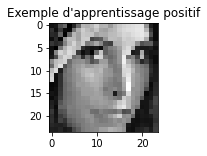

In [3]:
lena = cv2.imread("images/lena_color.tif", 0)

# On sélectionne la partie du visage et resize en une image 24x24 pixels
lena = cv2.resize(lena, (80,80))
lena = lena[35:59,32:56]

plt.figure(figsize=(2,2))
plt.imshow(lena, 'gray')
plt.title("Exemple d'apprentissage positif")
plt.show()

- Calcul de l'image intégrale

In [4]:
def image_integral(image):
    s = np.zeros(image.shape)
    ii = np.zeros(image.shape)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            s[x][y] = s[x-1][y] + image[x][y] if (y-1) >= 0 else image[x][y]
            ii[x][y] = ii[x][y-1] + s[x][y] if x-1 >=0 else s[x][y]
    # On rajoute une ligne et une colonne de '0' à gauche et en bas de l'image
    ii = np.c_[np.zeros(ii.shape[0]),ii]
    ii = np.r_[np.zeros((1,ii.shape[1])),ii]
    return ii

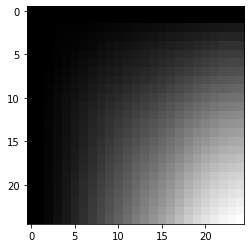

In [5]:
lena_integral = image_integral(lena)
plt.imshow(lena_integral, 'gray')
plt.show()

- Calcul des caractéristiques de Haar de l'exemple, simplifié par l'image intégrale

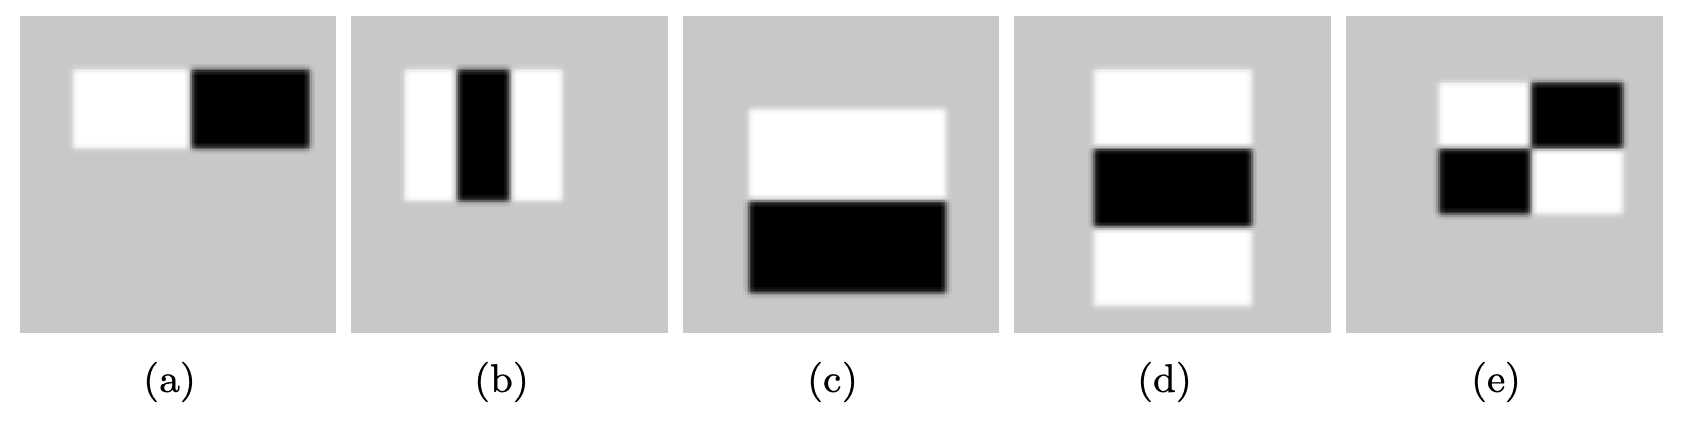

In [7]:
from IPython.display import Image 
Image(filename='images/haar.png')

In [8]:
def extract_haar_features(image_integrale):
    img = image_integrale
    d = [] #liste des caractéristiques de Haar calculées
    size = image_integrale.shape[0]
    
    # feauture de type (a)
    for i in range(size):
        for j in range(size):
             for w in range(1,size//2+1):   # on fait varier la largeur de la caractéristique
                for h in range(1,size):     # et sa hauteur
                    if(i+h < size and j+2*w < size):
                        # somme des pixels dans le rectangle blanc
                        S1 = img[i+h, j+w] + img[i,j] - (img[i, j+w]+img[i+h,j])
                        # somme des pixels dans le rectangle noir
                        S2 = img[i+h, j+2*w] + img[i, j+w] - (img[i, j+2*w] + img[i+h, j+w])
                        # on stocke la caractéristique : type, position dans la fenêtre, largeur, hauteur, valeur
                        feature = (['a',i,j,w,h], S1 - S2)
                        d.append(feature)

    #feature de type (b)
    for i in range (size):
        for j in range(size):
            for w in range(1,size//3+1):
                for h in range(1,size):
                    if(i+h < size and j + 3*w < size):
                        S1 = img[i+h, j+w] + img[i,j] - (img[i, j+w]+img[i+h,j])
                        S2 = img[i+h, j+2*w] + img[i, j+w] - (img[i, j+2*w] + img[i+h, j+w])
                        S3 = img[i+h, j+3*w] + img[i, j+2*w] - (img[i, j+3*w] + img[i+h, j+2*w])
                        feature = (['b',i,j,w,h], S1 - S2 + S3)
                        d.append(feature)
    
    #feature de type (c)
    for i in range (size):
        for j in range(size):
            for w in range(1,size):
                for h in range(1,size//2+1):
                    if(i+2*h < size and j + w < size):
                        S1 = img[i+h, j+w] + img[i,j] - (img[i, j+w]+img[i+h,j])
                        S2 = img[i+2*h, j+w] + img[i+h, j] - (img[i+h, j+w] + img[i+2*h, j])
                        feature = (['c',i,j,w,h], S1 - S2)
                        d.append(feature)

    #feature de type (d)
    for i in range (size):
        for j in range(size):
            for w in range(1,size):
                for h in range(1,size//3+1):
                    if(i+3*h < size and j + w  < size):
                        S1 = img[i+h, j+w] + img[i,j] - (img[i, j+w]+img[i+h,j])
                        S2 = img[i+2*h, j+w] + img[i+h, j] - (img[i+h, j+w] + img[i+2*h, j])
                        S3 = img[i+3*h, j+w] + img[i+2*h, j] - (img[i+2*h, j+w] + img[i+3*h, j])
                        feature = (['d',i,j,w,h], S1 - S2 + S3)
                        d.append(feature)

    #feature de type (e)
    for i in range (size):
        for j in range(size):
            for w in range(1,size//2+1):
                for h in range(1,size//2+1):
                    if(i+2*h < size and j + 2*w < size):
                        S1 = img[i+h, j+w] + img[i,j] - (img[i, j+w]+img[i+h,j])
                        S2 = img[i+2*h, j+w] + img[i+h, j] - (img[i+h, j+w] + img[i+2*h, j])
                        S3 = img[i+h, j+2*w] + img[i, j+w] - (img[i, j+2*w] + img[i+h, j+w])
                        S4 = img[i+2*h, j+2*w] + img[i+h, j+w] - (img[i+h, j+2*w] + img[i+2*h, j+w])
                        feature = (['e',i,j,w,h], S1 - S2 - S3 + S4)
                        d.append(feature)
    return d

In [9]:
features = extract_haar_features(lena_integral)
print("Nombre de caractéristiques : ", len(features),"\n")
print("Quelques exemples : ")
print(features[12345])
print(features[110003])
print(features[155559])

Nombre de caractéristiques :  162336 

Quelques exemples : 
(['a', 3, 13, 1, 16], -10.0)
(['c', 16, 10, 6, 4], 34.0)
(['e', 10, 3, 6, 7], 656.0)


Pour mettre au point leurs méthodes, Viola et Jones ont ainsi calculé les caractéristiques de milliers d'exemples positifs et négatifs, pour ensuite pouvoir déterminer lesquelles sont les plus efficaces pour reconnaître les visages.

### Étape de détection : application d'une caractéristique dans une fenêtre de détection

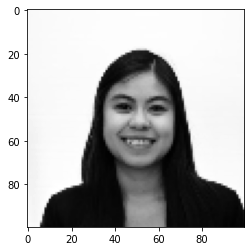

In [12]:
model = cv2.imread("images/model.jpg", 0)
model = cv2.resize(model, (100,100))
plt.imshow(model, 'gray')
plt.show()

- On va essayer de faire correspondre une caractéristique à la zone des yeux :

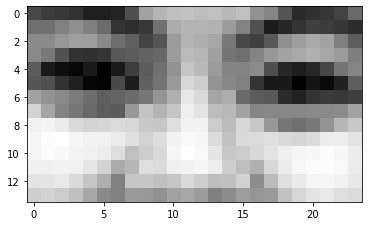

(14, 24)

In [13]:
plt.imshow(model[40:54,40:64], 'gray')
plt.show()
model[40:54,40:64].shape

- La caractéristique à appliquer :

In [14]:
c = np.array(([0,0,0],[1,1,1]), dtype='uint8')

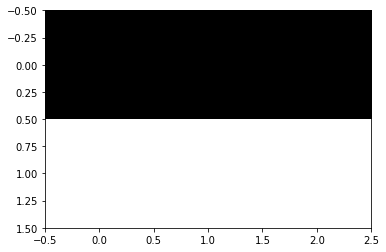

In [15]:
plt.imshow(c, 'gray')
plt.show()

In [16]:
# dimensions de la caractéristiques (dimension de la zone des yeux sur l'image)
w = 24 
h = 7

image = image_integral(model)
img = image.copy()

# On applique la caractéristique à toute l'image
for i in range(img.shape[0] - 2*h):
    for j in range(img.shape[1] - w):
        S1 = img[i+h, j+w] + img[i,j] - (img[i, j+w]+img[i+h,j])
        S2 = img[i+2*h, j+w] + img[i+h, j] - (img[i+h, j+w] + img[i+2*h, j])
        # valeur = (somme des pixels dans le rectangle blanc) - (somme des pixels dans le rectangle noir)
        image[i,j] = S2 - S1

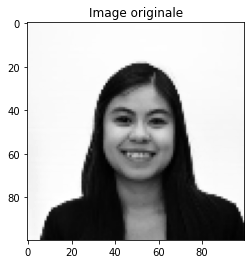

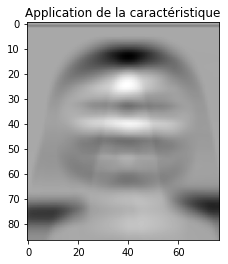

In [17]:
plt.imshow(model, 'gray')
plt.title("Image originale")
plt.show()
plt.imshow(image[:87,:77],'gray')
plt.title("Application de la caractéristique")
plt.show()

On observe bien une zone plus claire au niveau des coordonnées des yeux (avec un décalage haut-gauche).

Cela nous aide à comprendre le principe de la Cascade : certaines zones ne présentent rien d'intéressant et peuvent être éliminées en n'appliquant que quelques caractéristiques.